In [1]:
# Import Library dan Load Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

sns.set(style='whitegrid')
df = pd.read_csv("Project.csv")
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


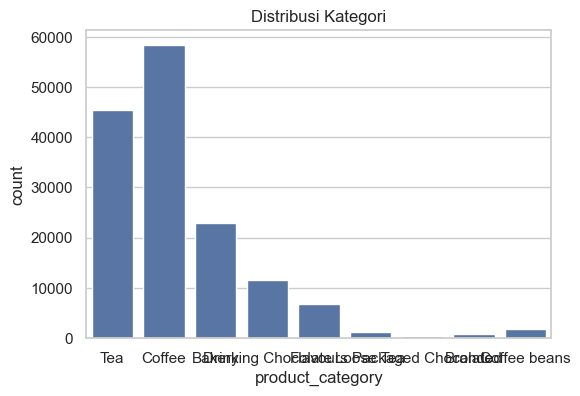

In [2]:
# Distribusi kategori produk
plt.figure(figsize=(6,4))
sns.countplot(x='product_category', data=df)
plt.title('Distribusi Kategori')
plt.show()

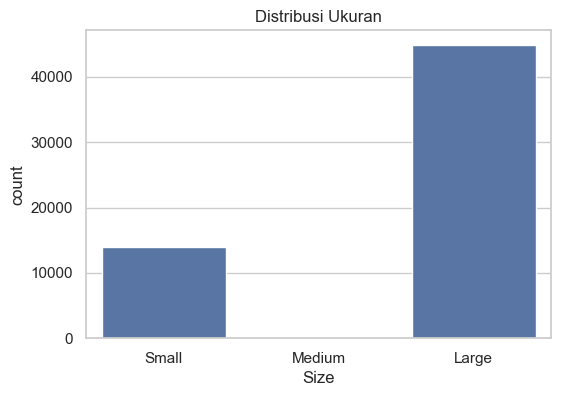

In [3]:
# Distribusi ukuran minuman
plt.figure(figsize=(6,4))
sns.countplot(x='Size', data=df, order=['Small', 'Medium', 'Large'])
plt.title('Distribusi Ukuran')
plt.show()

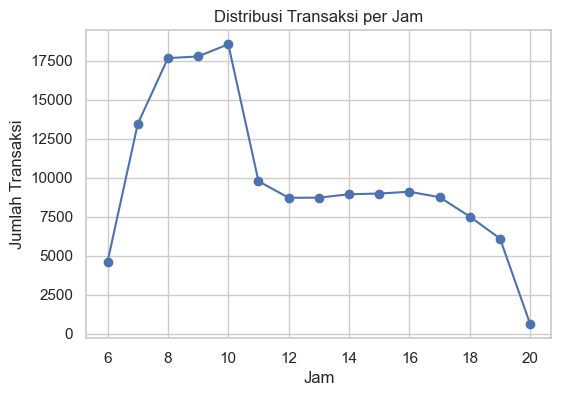

In [4]:
# Transaksi per jam
plt.figure(figsize=(6,4))
df['Hour'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Distribusi Transaksi per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.show()

In [5]:
# Preprocessing dan pelatihan model
features = ['transaction_qty', 'unit_price', 'Size', 'store_location', 'Hour']
df_model = df[features + ['product_category']].dropna()

# Encoding label kategorikal
le = LabelEncoder()
df_model['Size'] = le.fit_transform(df_model['Size'])
df_model['store_location'] = le.fit_transform(df_model['store_location'])
df_model['product_category'] = le.fit_transform(df_model['product_category'])

X = df_model.drop('product_category', axis=1)
y = df_model['product_category']

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Latih model Random Forest
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
# Evaluasi model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6522     0   277     0     0     0     0     0     0]
 [    0   204     0     1     0     0     0     0     0]
 [ 1073     0 12989     0     0     0     0     0  3388]
 [    0     6     0   508     0     0     0     0     0]
 [    0     0     0     0  3452     0     0     0     0]
 [    0     0     0     0     0  2043     0     0     0]
 [    0     0     0     0     0     0   342     0     0]
 [    0     0     0     0     0     0     0   146     0]
 [    0     0     0     0     0     0     0     0 13784]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6799
           1       0.97      1.00      0.98       205
           2       0.98      0.74      0.85     17450
           3       1.00      0.99      0.99       514
           4       1.00      1.00      1.00      3452
           5       1.00      1.00      1.00      2043
           6       1.00      1.00      1.00       342
           7       1.00      1.00      1.00       146